<a href="https://colab.research.google.com/github/oscarvel821/data_science/blob/main/softmax_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

In [4]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          32995        897  1.0              
tawfikelmetwally/automobile-dataset                                   Car information dataset                               6KB  2023-05-28 18:26:48           4140        119  0.9411765        
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           6254        131  1.0              
mohithsairamreddy/salary-data 

In [7]:
! kaggle competitions download -c digit-recognizer

 85% 13.0M/15.3M [00:01<00:00, 16.6MB/s]
100% 15.3M/15.3M [00:01<00:00, 12.2MB/s]


In [8]:
! unzip /content/digit-recognizer.zip

Archive:  /content/digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


#Digit Dataset

In [9]:
raw_df = pd.read_csv('/content/train.csv')

In [10]:
raw_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


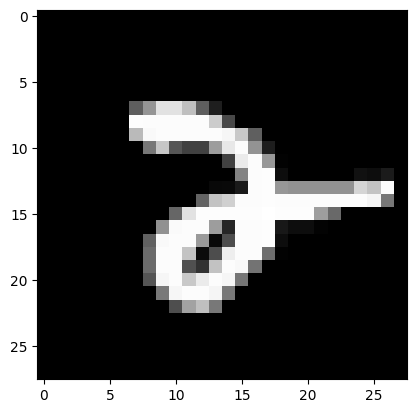

In [11]:
# pick a sample to plot
sample = 34
image = raw_df.iloc[sample].values[1:786]
# plot the sample
fig = plt.figure
plt.imshow(image.reshape(28,28), cmap='gray')
plt.show()

In [12]:
images = []
labels = []
nums = 10
for i in range(nums):
  label = raw_df.iloc[i].values[0]
  img = raw_df.iloc[i].values[1:786]
  labels.append(label)
  images.append(img.reshape(28,28))

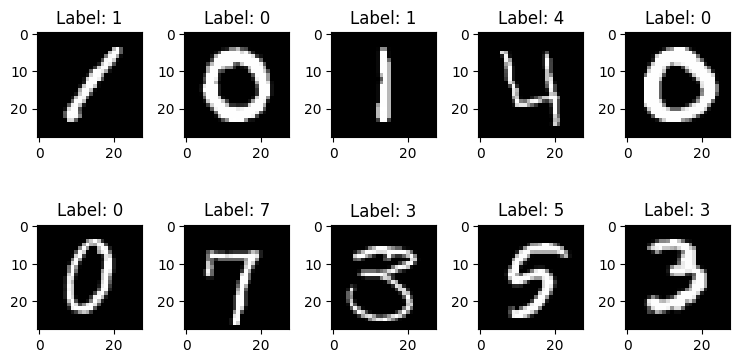

In [13]:
num_col = 5
num_row = 2

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(nums):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [14]:
y = raw_df['label'].to_numpy()

In [15]:
xi = ((raw_df.drop(['label'], axis=1)).iloc[0:42000]).to_numpy()

In [16]:
x_train, x_val, y_train, y_val = train_test_split(xi, y, test_size=0.30, random_state=12)

#Softmax Regression

In [17]:
class Softmax_Regression:
  def __init__(self, initial_params, num_of_class):
    self.params = initial_params
    self.num_of_class = num_of_class

  def learning_rate(self, t):
    return self.params['t0'] / (t + self.params['t1'])

  @staticmethod
  def _sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

  @staticmethod
  def normalize(X):
    # return (X - X.mean(axis=0)) / X.std(axis=0)
    return X / 255

  def predict(self, x):
    w_0 = self.params['weights']
    b_0 = self.params['bias']
    z = x @ w_0 + b_0
    return z

  def one_hot(self, y):
    y_hot = np.zeros((len(y), self.num_of_class))

    y_hot[np.arange(len(y)), y] = 1

    return y_hot

  @staticmethod
  def softmax(z):
    #subtracting the max of z for numerical stability
    exp = np.exp( z - np.max(z) )

    for i in range(len(z)):
      exp[i] /= np.sum(exp[i])

    return exp

  #Method to train the model - (mini-batch implementation)
  def train(self, X, y, eta=0.05, momentum=0.0, epochs=250, batch_size=100):

    M, n = X.shape

    x = self.normalize(X)

    hist = []

    weights_change = np.zeros((n, self.num_of_class))
    bias_change = np.zeros(self.num_of_class)

    for epoch in range(epochs):
      print(f"epoch: {epoch + 1}/{epochs}")
      shuffled_indices = np.random.permutation(M)
      X_shuffled = x[shuffled_indices]
      y_shuffled = y[shuffled_indices]
      for i in range((M-1)//batch_size + 1):

        start_i = i* batch_size
        end_i = start_i + batch_size

        # print(f"batch {start_i} - {end_i}")

        xi = X_shuffled[start_i:end_i]
        yi = y_shuffled[start_i: end_i]

        y_hat = self.predict(xi)
        y_hat = self.softmax(y_hat)

        y_hot = self.one_hot(yi)

        dw = (xi.T @ (y_hat - y_hot)) / batch_size # Derivative of loss wrt w
        db = np.sum((y_hat - y_hot).T, 1) / batch_size # Derivative of loss wrt b

        # self.eta = self.learning_rate(epoch*((M-1)//bs + 1) + i)

        # Update w and b
        weights_diff = dw * eta + momentum * weights_change
        bias_diff = db * eta + momentum * bias_change

        self.params['weights'] = self.params['weights'] - weights_diff
        self.params['bias'] = self.params['bias'] - bias_diff

        weights_change = weights_diff
        bias_change = bias_diff

        # Calculating loss and appending it in the list.
        loss = -np.mean(np.log(y_hat[np.arange(len(yi)), yi]))

        hist.append(loss)

      print(f'loss : {hist[-1]}')

    return hist

  def predictions(self, X):

    x = self.normalize(X)

    y_hat = self.predict(x)
    y_hat = self.softmax(y_hat)

    return np.max(y_hat, axis=1), np.argmax(y_hat, axis=1)

  def accuracy(self, y, y_hat):

    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy


#Training

In [52]:
m, n = x_train.shape
w_i = np.zeros((n, 10))
b_i = np.zeros(10)
t0, t1 = 5, 50 #hyperparameters

In [53]:
params = {'weights' : w_i,
          'bias' : b_i,
          't0' : t0,
          't1' : t1}

In [54]:
model = Softmax_Regression(params, 10)

In [55]:
history = model.train(x_train, y_train, 0.05, 0.9, 60, 100)

epoch: 1/60
loss : 0.45929228595725946
epoch: 2/60
loss : 0.2470497683287157
epoch: 3/60
loss : 0.3974684488168826
epoch: 4/60
loss : 0.18642416724082073
epoch: 5/60
loss : 0.1842487554078042
epoch: 6/60
loss : 0.4153325971508916
epoch: 7/60
loss : 0.27544098885925883
epoch: 8/60
loss : 0.15241859939768074
epoch: 9/60
loss : 0.17785676987343038
epoch: 10/60
loss : 0.24928760467979244
epoch: 11/60
loss : 0.33184153591315196
epoch: 12/60
loss : 0.314997265729454
epoch: 13/60
loss : 0.23217731577521403
epoch: 14/60
loss : 0.14908120736210295
epoch: 15/60
loss : 0.29153405749528427
epoch: 16/60
loss : 0.3165524036784689
epoch: 17/60
loss : 0.16642944723917807
epoch: 18/60
loss : 0.26612845799601526
epoch: 19/60
loss : 0.25733838070134346
epoch: 20/60
loss : 0.292545049637557
epoch: 21/60
loss : 0.3473988314750757
epoch: 22/60
loss : 0.09962728905729333
epoch: 23/60
loss : 0.2948139657189493
epoch: 24/60
loss : 0.20233705647410333
epoch: 25/60
loss : 0.41868295697234686
epoch: 26/60
loss : 

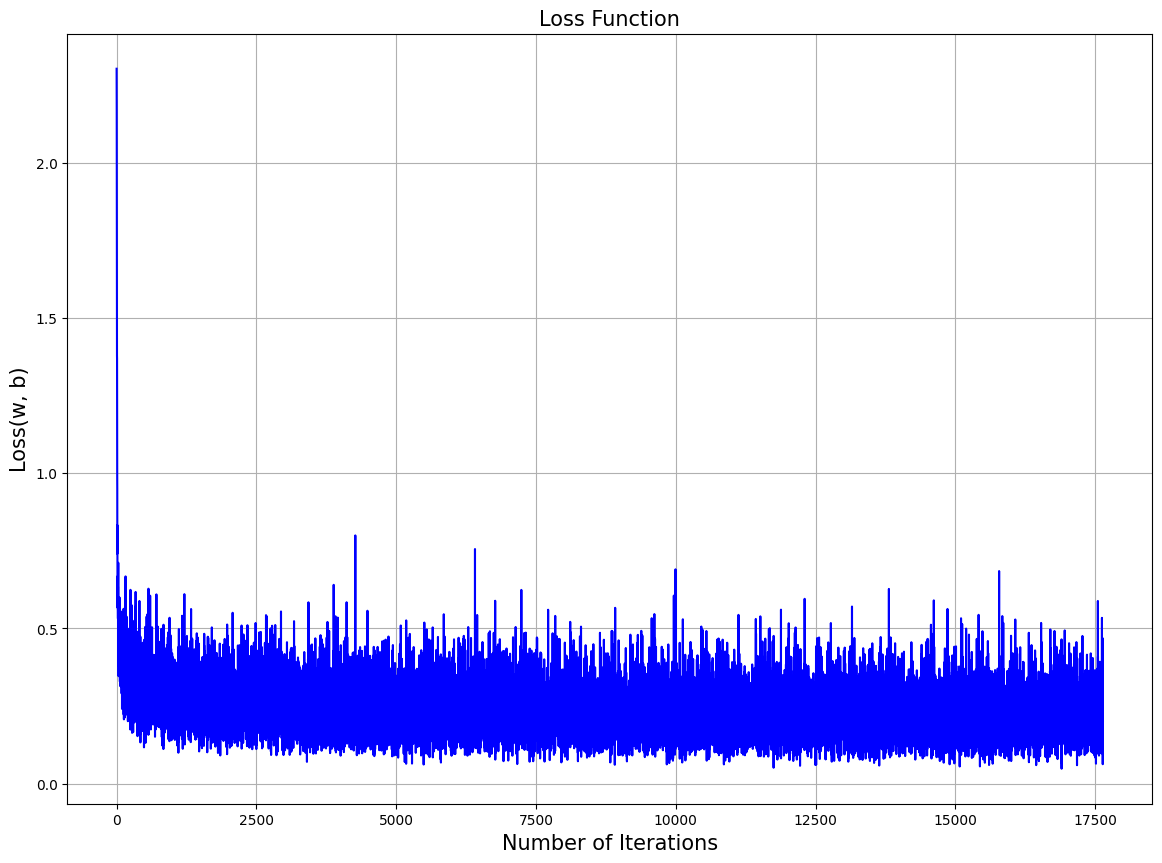

In [56]:
fig, ax = plt.subplots(figsize=(14,10))

plt.title("Loss Function", fontsize='15')
plt.xlabel('Number of Iterations', fontsize='15')
plt.ylabel(r'Loss(w, b)', fontsize='15')
# plt.figtext(x=.56, y=.6, s="At the final iteration:\n\nw = {}\nb = {}".format(w, b))
ax.plot(history, 'b')
ax.grid()
plt.show()

#Validation

In [57]:
prob, y_hat = model.predictions(x_val)

In [58]:
model.accuracy(y_val, y_hat)

0.9192857142857143

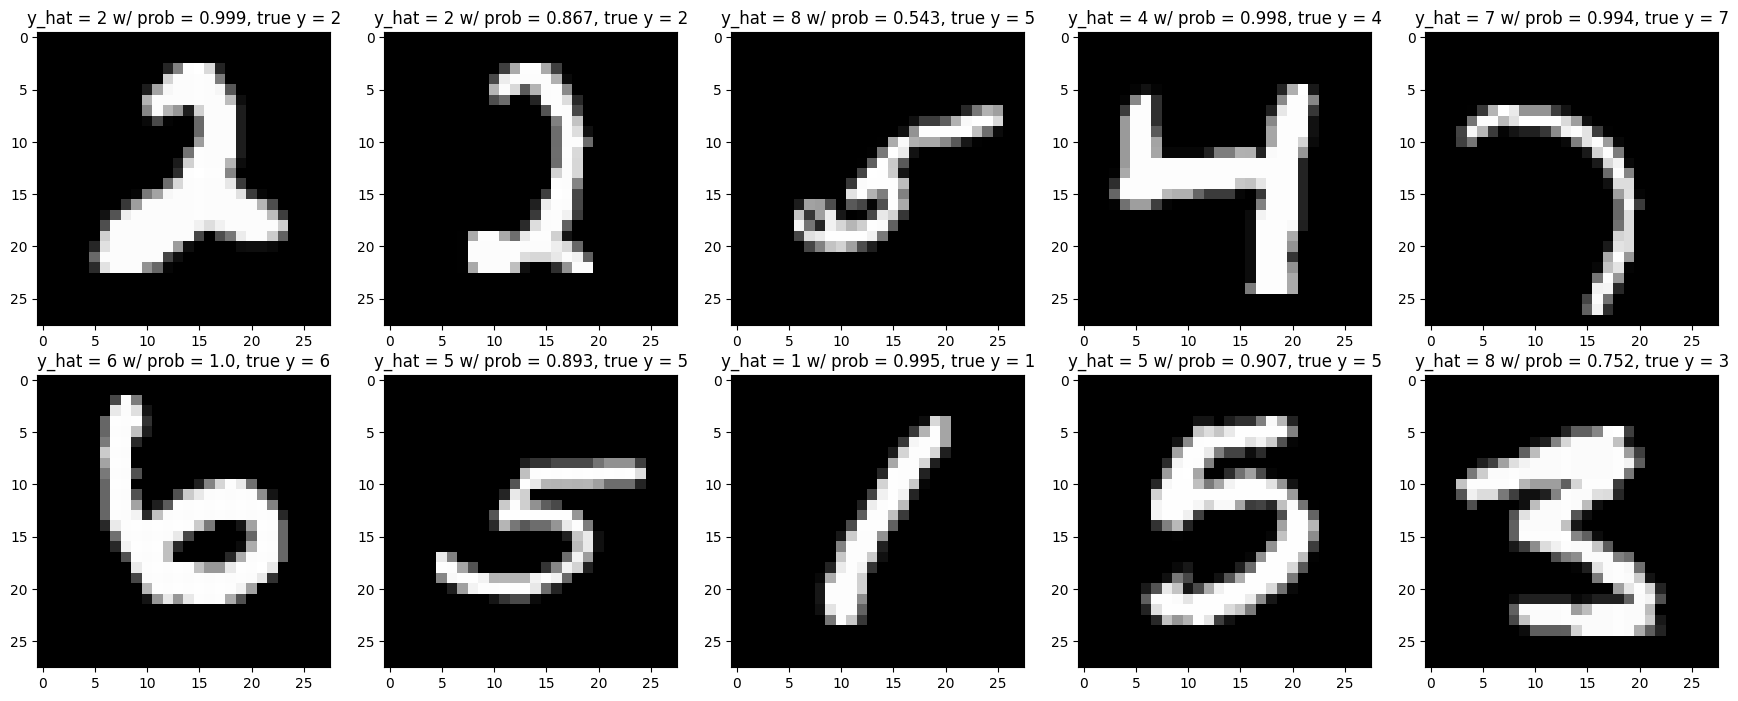

In [59]:
num_col = 5
num_row = 2

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(3.5*num_col,3.5*num_row))
for i in range(nums):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(x_val[i].reshape(28,28), cmap='gray')
    ax.set_title(f'y_hat = {y_hat[i]} w/ prob = {round(prob[i], 3)}, true y = {y_val[i]}')
plt.tight_layout()
plt.show()

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_hat)
print(cm)

[[1237    0    2    2    1    9   13    0    7    0]
 [   0 1363    0    7    1    4    2    2   15    1]
 [  11    9 1049   26   13    7   21   16   42    8]
 [   4    5   33 1221    1   40    7   10   28   14]
 [   7   10    3    0 1082    2   12    9    9   41]
 [  25    6    8   41   13  986   34    5   31   10]
 [  10    3    4    0    6   11 1209    2    3    0]
 [   4    6   17    4    6    4    1 1223    2   35]
 [   7   28   15   32    8   27   16    4 1084   16]
 [   7   10    2   16   27    8    0   32   17 1129]]


In [61]:
temp = np.tile((np.sum(cm, axis=0)), (10,1))

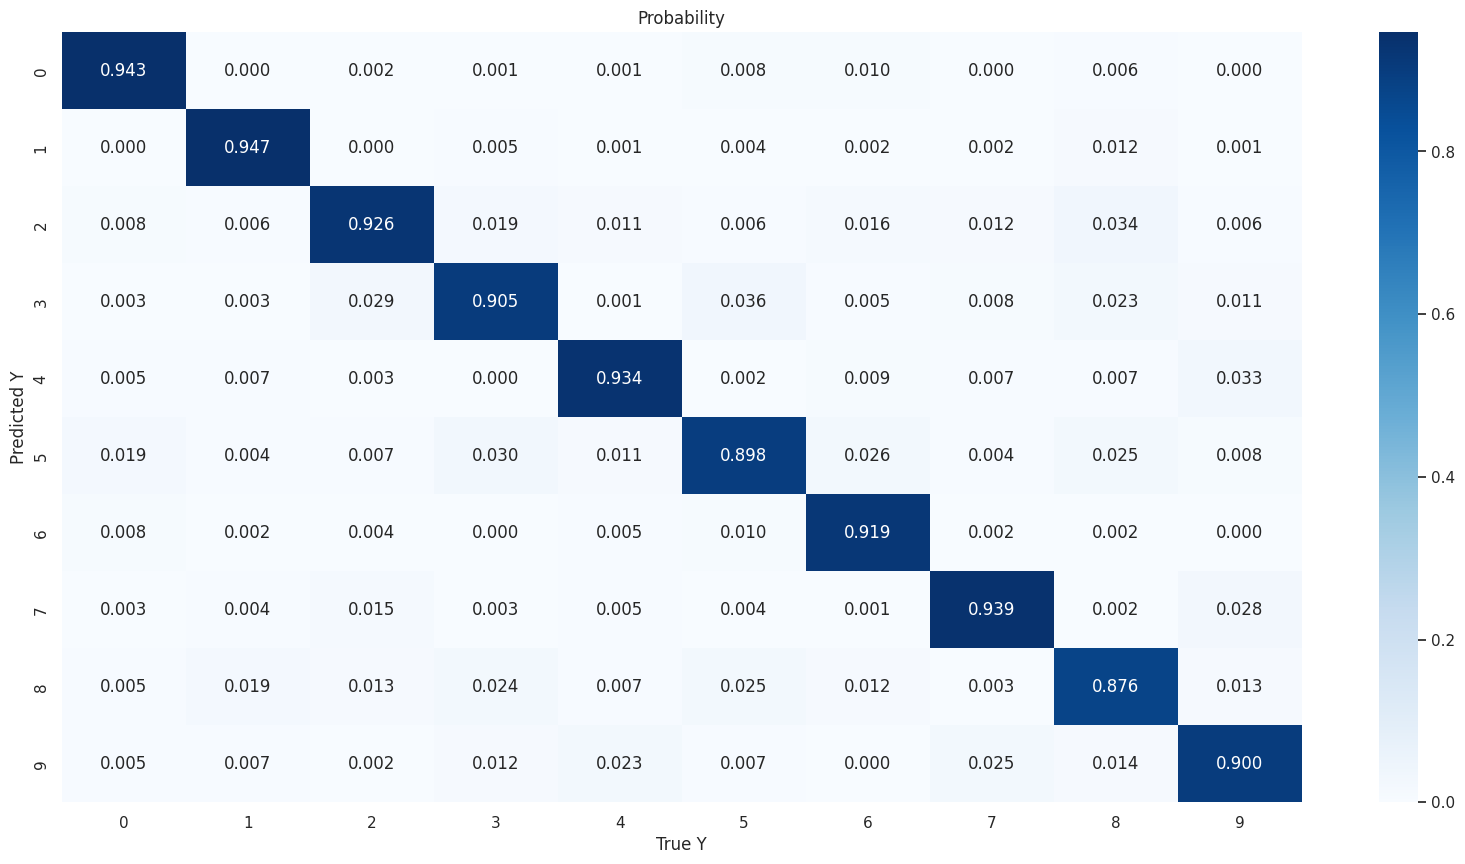

In [62]:
import seaborn as sns

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

fig, ax = plt.subplots(figsize=(20,10))

ax.set_title("Probability")

sns.heatmap(cm/temp, annot=True, fmt=".3f", cmap='Blues')

ax.set_xlabel("True Y")
ax.set_ylabel("Predicted Y")
plt.show()